In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 第十二週：作業一 (酒的數據庫，選取兩個以上變數)

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine=load_wine()

In [4]:
x=wine.data
y=wine.target

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca=PCA(n_components=2)

### 1.把所有變數都丟進去分類

In [7]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
X=pca.transform(x)            #把所有變數濃縮成兩維的

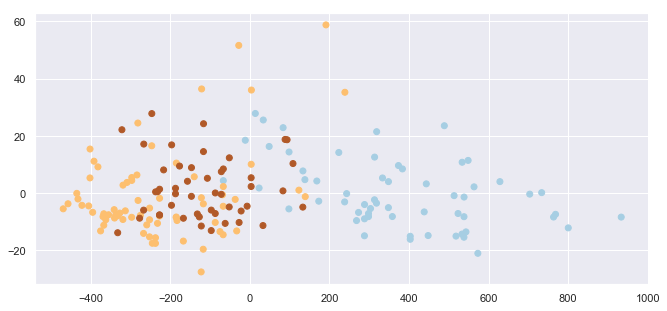

In [34]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='Paired')    #把實際的分類劃出來，看起來好像蠻難分的

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
from sklearn.svm import SVC

In [13]:
clf=SVC(gamma='auto')

In [14]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_predict=clf.predict(x_test)

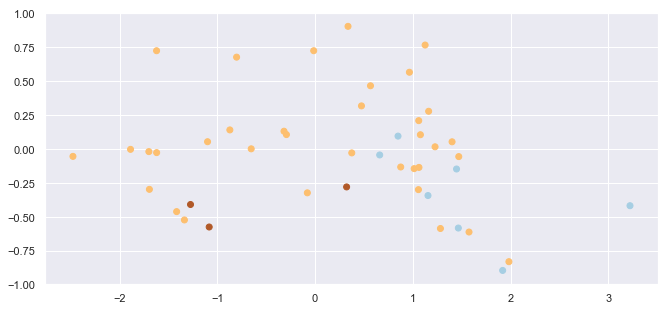

In [30]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict-y_test,cmap='Paired')

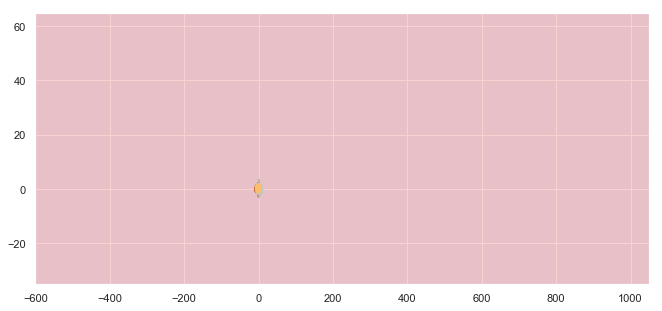

In [33]:
x0=np.arange(-600,1050,0.1)
y0=np.arange(-35,65,0.1)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]

z=clf.predict(P)
Z=z.reshape(xm.shape)

plt.contourf(xm,ym,Z,alpha=0.2,cmap='Paired')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')

#### 結果做出來分類結果長得超奇怪的，看來並不是變數愈多分得越好。故延續上周做的(分別以「正相關最大的兩個」以及「負相關最大的兩個」作為變數來分類)，改取相關係數前三大的變數(不管正負)，將其濃縮成二維資料來分類。

In [17]:
wine_data=pd.DataFrame(wine.data,columns=wine.feature_names)
wine_data['class']=wine.target
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


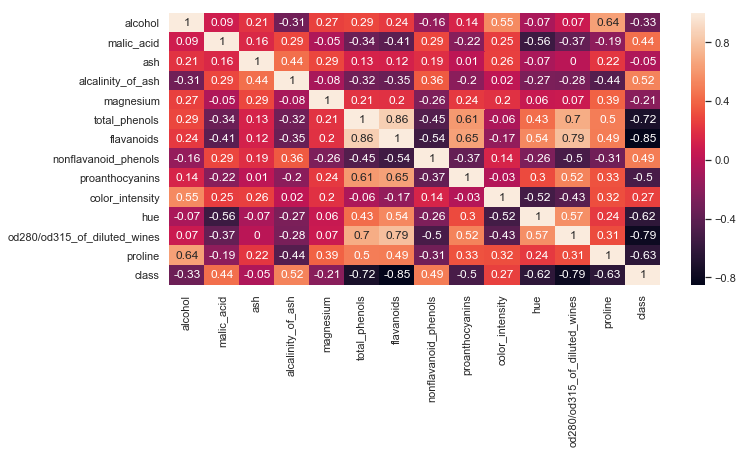

In [18]:
correlation_matrix=wine_data.corr().round(2)
sns.set(rc={'figure.figsize':(11,5)})
sns.heatmap(correlation_matrix,annot=True)

### 2.改取相關性最大的三個變數「total_phenols」,「flavanoids」,「od280/od315_of_diluted_wines」來分類

In [22]:
x1=x[:,[5,6,11]]

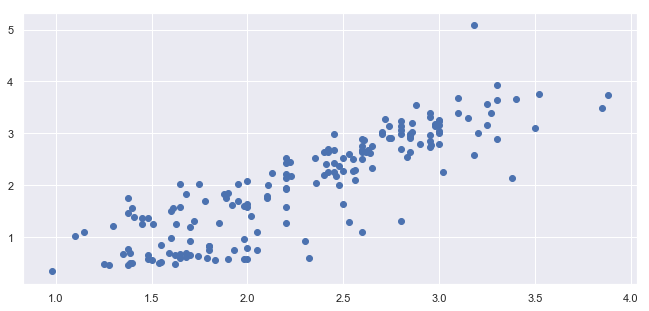

In [23]:
pca.fit(x1)
X1=pca.transform(x1)          #先把三個變數濃縮成二維
plt.scatter(x1[:,0],x1[:,1])

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=0)

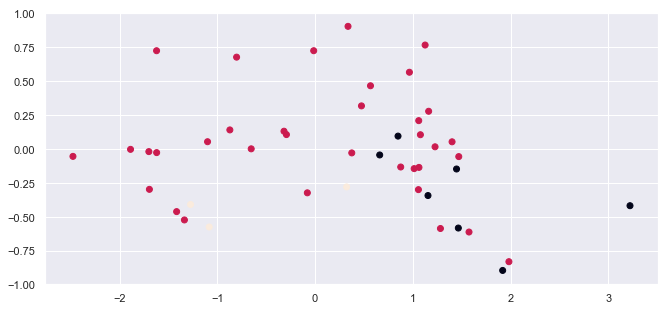

In [25]:
clf=SVC(gamma='auto')
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict-y_test)

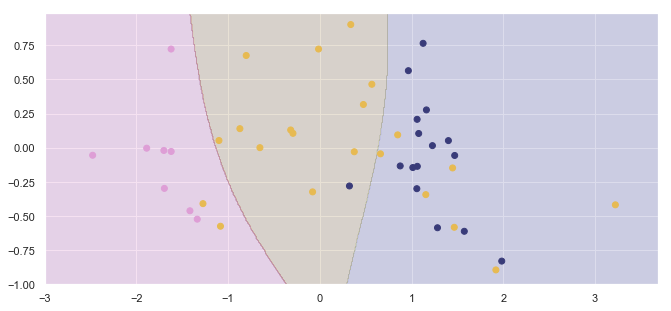

In [26]:
x0=np.arange(-3,3.7,0.01)
y0=np.arange(-1,1,0.01)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]

z=clf.predict(P)
Z=z.reshape(xm.shape)

plt.contourf(xm,ym,Z,alpha=0.2,cmap='tab20b')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='tab20b')

#### 可以看的出來比全部變數都放進去分類好很多了，但中間黃色的點還是有蠻多跑到紫色區塊，那部分預測的仍不太理想，上周只採用「flavanoids」及「od280/od315_of_diluted_wines」的分類效果較好。